In [21]:
import numpy as np
from numpy import matlib as ml
import pandas as pd
import os
import warnings
import librosa
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from random import shuffle
import scipy.stats as st

from pynwb import NWBHDF5IO

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec

import pydtmc

import pdb
# warnings.filterwarnings('ignore')

In [2]:
# ----- LOAD DATA -----
data = pd.read_csv('all_annotations.csv')

# ----- FIGURES -----
outp = os.path.join('figures','2024August')

In [29]:
# ----- TRY TO MAKE A TRANSITION MATRIX -----
assay = 'introduction'

introdf = data[data.assay==assay]

# need to make transitions for each pair individually
# then I can aggregate counts for test groups
# make 4 matrices of transition probabilities

introdf['next_behav'] = introdf.groupby('pair_tag').behavior.shift(periods=-1)

sex = 'F'
gt = 'WT'

thisdf = introdf[np.logical_and(introdf.sex==sex,introdf.GT==gt)]
theseTransitions = thisdf.groupby(['behavior', 'next_behav'])
theseCounts = {i[0]:len(i[1]) for i in theseTransitions}

behavs = sorted(thisdf.behavior.unique())

matrix = pd.DataFrame()

for x in behavs:
    matrix[x] = pd.Series([theseCounts.get((x,y), 0) for y in behavs], index=behavs)
    
cols = matrix.columns
matrix[cols] = matrix[cols].div(matrix[cols].sum(axis=1), axis=0)
    
matrixnp = matrix.to_numpy()

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_10972\371857808.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  introdf['next_behav'] = introdf.groupby('pair_tag').behavior.shift(periods=-1)


In [36]:
mc = pydtmc.MarkovChain(matrixnp,behavs)

(<Figure size 600x400 with 1 Axes>, <AxesSubplot: >)

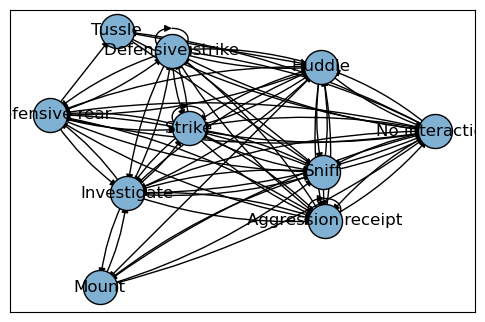

In [43]:
pydtmc.plot_graph(mc,nodes_color=True,edges_label=False)